In [ ]:
pip install fastapi

     |████████████████████████████████| 51kB 2.4MB/s 
     |████████████████████████████████| 61kB 3.9MB/s 
     |████████████████████████████████| 9.2MB 5.4MB/s 


In [ ]:
pip install uvicorn[standard]

     |████████████████████████████████| 51kB 2.7MB/s 
     |████████████████████████████████| 61kB 4.3MB/s 
     |████████████████████████████████| 81kB 3.4MB/s 
     |████████████████████████████████| 225kB 6.1MB/s 
     |████████████████████████████████| 645kB 7.5MB/s 
     |████████████████████████████████| 3.9MB 12.4MB/s 
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
pip install joblib


In [1]:
pip install unidecode

In [2]:
pip install stop_words

In [3]:
pip install vecstack

  Created wheel for vecstack: filename=vecstack-0.4.0-cp36-none-any.whl size=19880 sha256=eaf1d49998531b1688907b9889d6e34f2c7f950e3b73e2265d3b074454813867
  Stored in directory: /root/.cache/pip/wheels/5f/bb/4e/f6488433d53bc0684673d6845e5bf11a25240577c8151c140e
Successfully built vecstack


In [4]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.24.1)


In [5]:
import sklearn
sklearn.__version__

'0.24.1'

In [6]:
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
import pandas as pd

data = pd.read_csv(r"/content/comments_train (1).csv")
data

,comment,sentiment
0,J'ai réservé ma table quelques mois à l'avance...,Positive
1,Que dire... Nicolas sale est un chef d excepti...,Positive
2,Dans une rue tranquille non loin du Panthéon u...,Positive
3,Rien à redire le restaurant est irréprochablem...,Positive
4,Comme avec les autres commentaires nos repas é...,Positive
...,...,...
1612,Le service a été rapide et les crêpes très bon...,Positive
1613,Restaurant excellent bon rapport qualité-prix ...,Positive
1614,Incroyable mais vrai 190€ la baguette ! Que di...,Negative
1615,Un japonais assez chic des beaux quartiers. No...,Positive


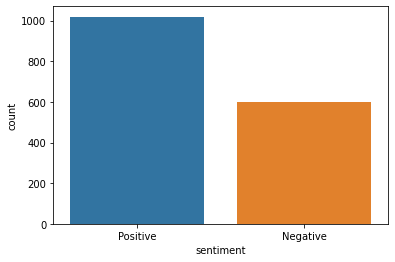

In [8]:
import seaborn as sns

sns.countplot(x ='sentiment', data=data)

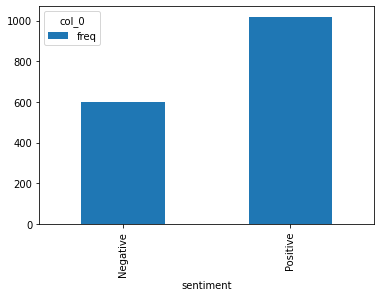

In [9]:
pd.crosstab(data.sentiment, "freq").plot.bar()

In [10]:
print('Le dataset a {} lignes et {} colonnes.'.format(data.shape[0], data.shape[1]))

Le dataset a 1617 lignes et 2 colonnes.


In [11]:
print('Les différents variables sont : {}.'.format(data.columns.tolist()))

Les différents variables sont : ['comment', 'sentiment'].


In [12]:
data2 = data.copy()
data2

,comment,sentiment
0,J'ai réservé ma table quelques mois à l'avance...,Positive
1,Que dire... Nicolas sale est un chef d excepti...,Positive
2,Dans une rue tranquille non loin du Panthéon u...,Positive
3,Rien à redire le restaurant est irréprochablem...,Positive
4,Comme avec les autres commentaires nos repas é...,Positive
...,...,...
1612,Le service a été rapide et les crêpes très bon...,Positive
1613,Restaurant excellent bon rapport qualité-prix ...,Positive
1614,Incroyable mais vrai 190€ la baguette ! Que di...,Negative
1615,Un japonais assez chic des beaux quartiers. No...,Positive


In [13]:
from unidecode import unidecode
import re
import nltk
import stop_words
from nltk.corpus import stopwords
from stop_words import get_stop_words
s_w=list(set(stopwords.words('french')+stop_words.get_stop_words('fr')))+['plus']

def nettoyage(texte):
    tex=[]
    s_w=list(set(stopwords.words('french')+stop_words.get_stop_words('fr')))+['plus']
    s_w=[unidecode(elem.lower()) for elem in s_w]
    # mettre en minuscule
    texte=texte.lower()
    # enlever les accents
    texte=unidecode(texte).replace("'"," ")
    
    # Lematize/Stem
    
    
    # enlever les chiffres et caracteres spéciaux
    pattern="([a-z]+)"
    
    for elem in re.findall(pattern,texte):
        # enlever les stop words
        if elem in s_w:
            continue
        else:
            tex.append(elem)
    return ' '.join(tex)

In [14]:
data.comment = data.comment.apply(nettoyage)

In [15]:
data.sentiment = data.sentiment.apply(nettoyage)

In [16]:
data

,comment,sentiment
0,reserve table quelques mois avance service imp...,positive
1,dire nicolas sale chef exception dire rien inc...,positive
2,rue tranquille non loin pantheon joyau culinai...,positive
3,rien redire restaurant irreprochablement propr...,positive
4,autres commentaires repas incroyablement delic...,positive
...,...,...
1612,service rapide crepes bonnes pates crepe salee...,positive
1613,restaurant excellent rapport qualite prix accu...,positive
1614,incroyable vrai baguette dis flute g reviendro...,negative
1615,japonais assez chic beaux quartiers alles deje...,positive


In [86]:
data.comment[0]

'reserve table quelques mois avance service impeccable pendant processus arrives temps rapidement assis personnel accueillant attention details verre champagne'

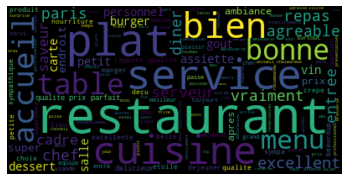

In [17]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(' '.join(list(data['comment'])))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

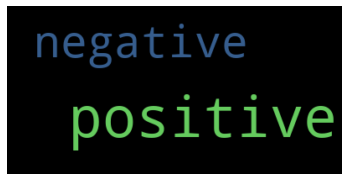

In [18]:
wordcloud = WordCloud().generate(' '.join(list(data['sentiment'])))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
import joblib

pipeline_filename = "/content/sentiment_pipe (1).joblib"

pipeline = joblib.load(pipeline_filename)


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator SVC from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator Pipeline from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning

In [20]:
pipeline

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', SVC(C=1000, gamma=0.001))])

In [21]:
pipeline.predict(data.comment)

array([1, 1, 1, ..., 1, 1, 1])

In [22]:
data['sentiment'] = data['sentiment'].astype('category').cat.codes

In [23]:
y = data['sentiment'] 

In [24]:
pipeline.score(data.comment,y)

0.6468769325912183

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y, pipeline.predict(data.comment)))

              precision    recall  f1-score   support

           0       0.80      0.06      0.11       598
           1       0.64      0.99      0.78      1019

    accuracy                           0.65      1617
   macro avg       0.72      0.53      0.45      1617
weighted avg       0.70      0.65      0.53      1617



In [27]:
from sklearn.metrics import f1_score, roc_curve

print('Roc curve:', roc_curve(y , pipeline.predict(data.comment)))

Roc curve: (array([0.        , 0.93979933, 1.        ]), array([0.        , 0.99116781, 1.        ]), array([2, 1, 0]))


In [28]:
f1_score(y,pipeline.predict(data.comment) , average='macro')

0.4457984421490109

In [29]:
f1_score(y,pipeline.predict(data.comment) , average='micro')

0.6468769325912183

In [30]:
f1_score(y,pipeline.predict(data.comment))

0.7796217676572752

In [31]:
from sklearn.metrics import roc_auc_score
print('Roc curve:', roc_auc_score(y, pipeline.predict(data.comment)))

Roc curve: 0.5256842402381507


<Figure size 432x288 with 0 Axes>

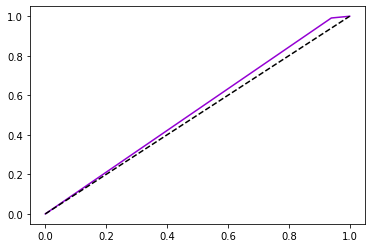

<Figure size 432x288 with 0 Axes>

In [32]:
from sklearn.metrics import roc_curve, auc

[fpr1, tpr1, thr1] = roc_curve(y, pipeline.predict(data.comment))
plt.figure()
plt.plot(fpr1, tpr1, color='darkviolet', label='ROC curve (area = %0.3f)' % auc(fpr1, tpr1))
plt.plot([0, 1], [0, 1], 'k--')
plt.figure()

In [33]:
auc(fpr1,tpr1)

0.5256842402381507

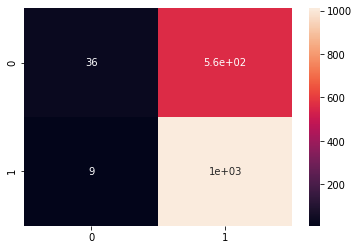

In [34]:
import sklearn.metrics as metrics
cnf_matrix = metrics.confusion_matrix(y,pipeline.predict(data.comment))
#print(cnf_matrix)
sns.heatmap(cnf_matrix,annot=True)

In [35]:
results={'Accuracy':[pipeline.score(data.comment,y)], 'F1 score' :[f1_score(y,pipeline.predict(data.comment))], 'Courbe Roc': [roc_auc_score(y, pipeline.predict(data.comment))]}
results

{'Accuracy': [0.6468769325912183],
 'Courbe Roc': [0.5256842402381507],
 'F1 score': [0.7796217676572752]}

In [36]:

DATA1 = pd.DataFrame(results, index=['valeurs'])
DATA1

,Accuracy,F1 score,Courbe Roc
valeurs,0.646877,0.779622,0.525684


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range = (1,3))
X = vectorizer.fit_transform(data.comment)
print(vectorizer.get_feature_names())



['abasourdi', 'abasourdi bruit', 'abasourdi bruit terrible', 'abeille', 'abeille cadre', 'abeille cadre raffine', 'abeille excellent', 'abeille excellent restaurant', 'abeille restes', 'abeille restes plusieurs', 'abondance', 'abondance delicatesse', 'abondance delicatesse permettent', 'abondance mise', 'abondance mise bouche', 'abord', 'abord agreablement', 'abord agreablement surpris', 'abord attente', 'abord attente entre', 'abord attire', 'abord attire decue', 'abord cadre', 'abord cadre accueil', 'abord cadre agreable', 'abord commande', 'abord commande douzaine', 'abord entree', 'abord entree avce', 'abord entree puis', 'abord excite', 'abord excite curiosite', 'abord fils', 'abord fils amie', 'abord fortement', 'abord fortement incite', 'abord impression', 'abord impression entrer', 'abord petites', 'abord petites becassines', 'abord pierre', 'abord pierre gagnaire', 'abord plats', 'abord plats presentent', 'abord rables', 'abord rables ensuite', 'abordable', 'abordable agrement

In [38]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state= 1, stratify = y)

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000) 
rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=1000)

In [40]:
y_pred2= rf.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred2)

0.7359550561797753

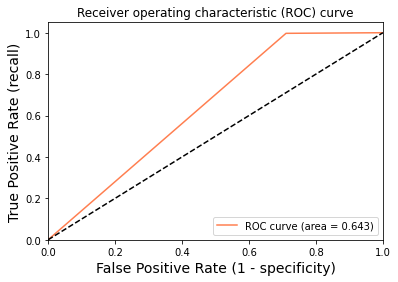

In [42]:
from sklearn.metrics import roc_curve, auc

[fpr2, tpr2, thr2] = roc_curve(y_test, y_pred2)
plt.figure()
plt.plot(fpr2, tpr2, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr2, tpr2))
plt.plot([0, 1], [0, 1], 'k--')
#plt.plot([0,fpr2[idx]], [tpr2[idx],tpr2[idx]], 'k--', color='green')
#plt.plot([fpr2[idx],fpr2[idx]], [0,tpr2[idx]], 'k--', color='green')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [43]:
auc(fpr2, tpr2)

0.6431863712361987

In [44]:
rf.feature_importances_

array([3.45824628e-05, 2.43288164e-05, 1.99060096e-05, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [45]:
f1_score(y_test, y_pred2)

0.8265682656826568

In [46]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
B = BaggingClassifier(DecisionTreeClassifier(random_state=1))
B.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1))

In [47]:
y_pred= B.predict(X_test)

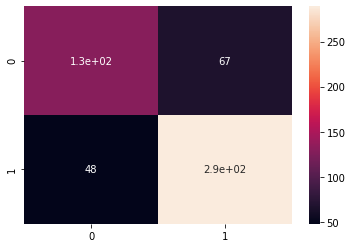

In [48]:
import sklearn.metrics as metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
#print(cnf_matrix)
sns.heatmap(cnf_matrix,annot=True)

In [49]:
metrics.accuracy_score(y_test, y_pred)

0.7846441947565543

In [50]:
f1_score(y_test, y_pred)

0.834054834054834

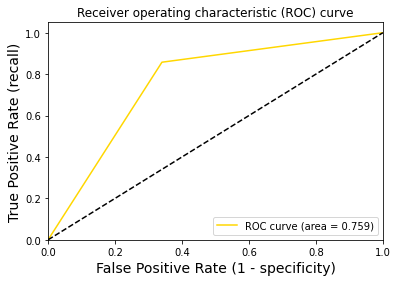

In [51]:
[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='gold', label='ROC curve (area = %0.3f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
#plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
#plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [52]:
auc(fpr,tpr)

0.7587326213679977

In [53]:
from xgboost import XGBClassifier

mod = XGBClassifier(booster='gbtree',num_parallel_tree = 100)
mod

XGBClassifier(num_parallel_tree=100)

In [54]:
mod1 = mod.fit(X_train, y_train)

In [55]:
from sklearn.metrics import accuracy_score
ypred_test = mod1.predict(X_test)
ypred_train = mod1.predict(X_train)
aTR = accuracy_score(y_train, ypred_train)
aTe = accuracy_score(y_test, ypred_test)
print(aTR)
print(aTe)

0.8790397045244691
0.7752808988764045


In [56]:
Moa = mod1.score(X_train, y_train)
Mot = mod1.score(X_test, y_test)
print(Moa) 
print(Mot)

0.8790397045244691
0.7752808988764045


In [57]:
from sklearn.metrics import classification_report

crTr = classification_report(y_train, ypred_train)
crTe = classification_report(y_test, ypred_test)
print(crTr)
print(crTe)

              precision    recall  f1-score   support

           0       0.97      0.69      0.81       401
           1       0.85      0.99      0.91       682

    accuracy                           0.88      1083
   macro avg       0.91      0.84      0.86      1083
weighted avg       0.89      0.88      0.87      1083

              precision    recall  f1-score   support

           0       0.84      0.48      0.61       197
           1       0.76      0.95      0.84       337

    accuracy                           0.78       534
   macro avg       0.80      0.71      0.73       534
weighted avg       0.79      0.78      0.76       534



In [58]:
f1_score(y_test, ypred_test)

0.841688654353562

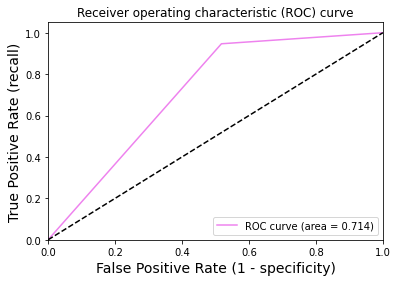

In [59]:
[fpr3, tpr3, thr3] = metrics.roc_curve(y_test, ypred_test)
plt.figure()
plt.plot(fpr3, tpr3, color='violet', label='ROC curve (area = %0.3f)' % metrics.auc(fpr3, tpr3))
plt.plot([0, 1], [0, 1], 'k--')
#plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
#plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [60]:
auc(fpr3,tpr3)

0.7144105198150297

In [61]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [62]:
yp2 = clf.predict(X_test)

In [63]:
metrics.accuracy_score(y_test, yp2)

0.7284644194756554

In [64]:
f1_score(y_test, yp2)

0.7883211678832116

In [65]:
print(classification_report(y_test, yp2))

              precision    recall  f1-score   support

           0       0.64      0.60      0.62       197
           1       0.78      0.80      0.79       337

    accuracy                           0.73       534
   macro avg       0.71      0.70      0.70       534
weighted avg       0.73      0.73      0.73       534



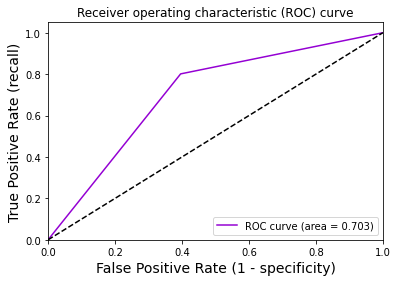

In [66]:
[fpr4, tpr4, thr4] = metrics.roc_curve(y_test, yp2)
plt.figure()
plt.plot(fpr4, tpr4, color='darkviolet', label='ROC curve (area = %0.3f)' % metrics.auc(fpr4, tpr4))
plt.plot([0, 1], [0, 1], 'k--')
#plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
#plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [67]:
auc(fpr4,tpr4)

0.7026239286628808

In [68]:
from sklearn.linear_model import LogisticRegression
m = LogisticRegression()
m.fit(X_train, y_train)


LogisticRegression()

In [69]:
yp3 = m.predict(X_test)

In [70]:
metrics.accuracy_score(y_test, yp3)

0.6797752808988764

In [71]:
f1_score(y_test, yp3)

0.7976331360946746

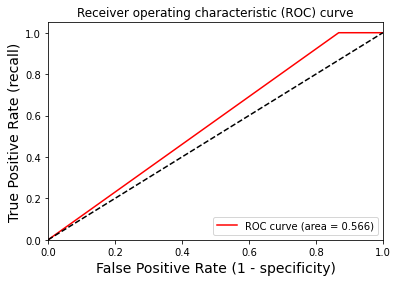

In [72]:
[fpr5, tpr5, thr5] = metrics.roc_curve(y_test, yp3)
plt.figure()
plt.plot(fpr5, tpr5, color='red', label='ROC curve (area = %0.3f)' % metrics.auc(fpr5, tpr5))
plt.plot([0, 1], [0, 1], 'k--')
#plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
#plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [73]:
auc(fpr5, tpr5)

0.565989847715736

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from vecstack import stacking
from sklearn.svm import LinearSVC

In [75]:
models = [
    KNeighborsClassifier(n_neighbors=19,
                        n_jobs=-1),
        
    RandomForestClassifier(random_state=42, n_jobs=-1, 
                           n_estimators=100, max_depth=3),
        
    XGBClassifier(random_state=42, n_jobs=-1, learning_rate=0.1, 
                  n_estimators=100, max_depth=3),
    LinearSVC(random_state=42),
    
    LogisticRegression(random_state=42,n_jobs=-1)
    
    
]



S_train, S_test = stacking(models,                   
                           X_train, y_train, X_test,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=4, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [5]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.77121771]
    fold  1:  [0.77121771]
    fold  2:  [0.74169742]
    fold  3:  [0.80740741]
    ----
    MEAN:     [0.77288506] + [0.02329175]
    FULL:     [0.77285319]

model  1:     [RandomForestClassifier]
    fold  0:  [0.63099631]
    fold  1:  [0.63099631]
    fold  2:  [0.62730627]
    fold  3:  [0.62962963]
    ----
    MEAN:     [0.62973213] + [0.00150761]
    FULL:     [0.62973223]

model  2:     [XGBClassifier]
    fold  0:  [0.78966790]
    fold  1:  [0.78597786]
    fold  2:  [0.75645756]
    fold  3:  [0.77037037]
    ----
    MEAN:     [0.77561842] + [0.01322296]
    FULL:     [0.77562327]

model  3:     [LinearSVC]
    fold  0:  [0.77859779]
    fold  1:  [0.79335793]
    fold  2:  [0.77490775]
    fold  3:  [0.82962963]
    ----
    MEAN:     [0.79412327] + [0.02163079]
    FULL:     [0.794

In [76]:
model = XGBClassifier(random_state=42, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=100, max_depth=3)
    
model = model.fit(S_train, y_train)
y_pred = model.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

Final prediction score: [0.83895131]


In [77]:

clf2 = LinearSVC()

clf2.fit(X_train, y_train)

LinearSVC()

In [78]:
yp = clf2.predict(X_test)

In [79]:
metrics.accuracy_score(y_test, yp)

0.8127340823970037

In [80]:
f1_score(y_test, yp)

0.869109947643979

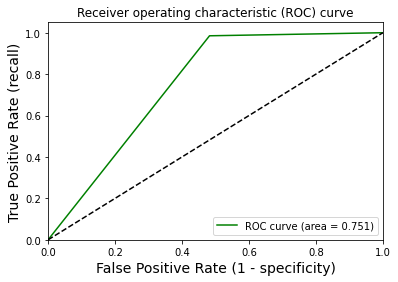

In [81]:
[fpr6, tpr6, thr6] = metrics.roc_curve(y_test, yp)
plt.figure()
plt.plot(fpr6, tpr6, color='green', label='ROC curve (area = %0.3f)' % metrics.auc(fpr6, tpr6))
plt.plot([0, 1], [0, 1], 'k--')
#plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
#plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [82]:
auc(fpr6, tpr6)

0.7514648511048517

In [83]:
results={'Bagging':[metrics.accuracy_score(y_test, y_pred),auc(fpr,tpr),f1_score(y_test, y_pred)],
         'Pipelinejoblib' :[pipeline.score(data.comment,y), auc(fpr1,tpr1),f1_score(y,pipeline.predict(data.comment))],
         'RandomForest': [accuracy_score(y_test, y_pred2), auc(fpr2, tpr2),f1_score(y_test, y_pred2)],
         'XgBoost':[aTe,auc(fpr3,tpr3),f1_score(y_test, ypred_test)],
          'DecisionTree':[metrics.accuracy_score(y_test, yp2),auc(fpr4,tpr4),f1_score(y_test, yp2)],
          'Régression logistique':[metrics.accuracy_score(y_test, yp3),auc(fpr5,tpr5),f1_score(y_test, yp3)],
           'SVC':[metrics.accuracy_score(y_test, yp),auc(fpr6,tpr6),f1_score(y_test, yp)]}
results

{'Bagging': [0.8389513108614233, 0.7587326213679977, 0.8837837837837837],
 'DecisionTree': [0.7284644194756554, 0.7026239286628808, 0.7883211678832116],
 'Pipelinejoblib': [0.6468769325912183,
  0.5256842402381507,
  0.7796217676572752],
 'RandomForest': [0.7359550561797753, 0.6431863712361987, 0.8265682656826568],
 'Régression logistique': [0.6797752808988764,
  0.565989847715736,
  0.7976331360946746],
 'SVC': [0.8127340823970037, 0.7514648511048517, 0.869109947643979],
 'XgBoost': [0.7752808988764045, 0.7144105198150297, 0.841688654353562]}

In [84]:
DATA1 = pd.DataFrame(results, index=['Accuracy', 'AUC', 'F1 Score'])
DATA1

,Bagging,Pipelinejoblib,RandomForest,XgBoost,DecisionTree,Régression logistique,SVC
Accuracy,0.838951,0.646877,0.735955,0.775281,0.728464,0.679775,0.812734
AUC,0.758733,0.525684,0.643186,0.714411,0.702624,0.565990,0.751465
F1 Score,0.883784,0.779622,0.826568,0.841689,0.788321,0.797633,0.869110
